<div class="alert alert-success"><h1>Using a Pretrained Model for Object Detection in Python</h1></div>

In this tutorial, you'll learn how to use a pretrained **YOLO** model for **object detection** in Python. Object detection is one of the most common tasks in computer vision. It involves identifying and localizing every instance of objects within an image. The output of an object detector includes the coordinates of the bounding boxes around each image, the predicted class for each box, and a confidence score indicating how certain the model is about each detection. Object detection is especially useful when we need to know what objects are present in an image as well as where they are located.

## Learning Objectives
By the end of this tutorial, you will know:
+ How to load and prepare a YOLO object detection model for inference
+ How to run inference and inspect raw detection outputs
+ How to draw and display bounding boxes with class labels and confidence scores

## Prerequisites
Before we begin, please ensure that you have:
+ A working knowledge of Python, including variables, functions, loops, and basic object-oriented programming.
+ A Python (version 3.x) environment with the `ultralytics`, `opencv-python`, `matplotlib`, and `Pillow` packages installed.

<hr>

## YOLO ("You Only Look Once")
YOLO, short for "You Only Look Once", is a family of high-performance deep learning models designed for real-time object detection. These models perform detection by framing detection as a single regression problem, predicting bounding boxes and class probabilities directly from full images in one evaluation. YOLO object detection models are trained on the **COCO** dataset and offer a range of model sizes (nano, small, medium, large, and extra large) that balance speed and accuracy for various applications.

Visit "https://docs.ultralytics.com/tasks/detect/" for a summary of available YOLO object detection models, their performance metrics, and recommended use cases.

## 1. Load the Pretrained Model
Import the YOLO class and load a pretrained detection model. Ultralytics will download the weights if they are not already present.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [14]:
from ultralytics import YOLO
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 40.3MB/s]


The model is now ready for object detection. We can choose other available models depending on the accuracy and speed trade-off we're targeting.

## 2. Specify the Input Image
Next, we define the path to the image file we want to process.

In [16]:
image_path =['trialpic.jpeg', 'trial2.jpeg', 'trial3.jpg']

However, before running the classification, let's display the image so we can visually confirm the input. This helps ensure the file path is correct and that the model will see the expected content.

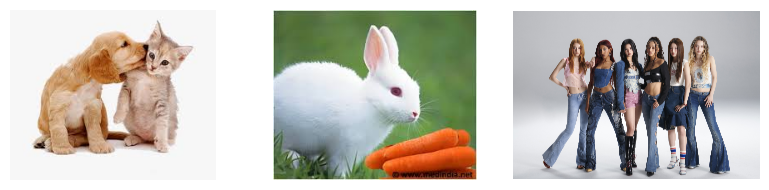

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(image_path), figsize=(8, 2))
for ax, path in zip(axes, image_path):
    img = Image.open(path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Run Object Detection on the Input Image
Now we pass the image path to the model. This automatically resizes the image to the model’s expected dimensions (640 × 640 by default), normalizes pixel values, and batches the input (if we pass several images).

In [18]:
results = model(image_path)


0: 640x640 2 cats, 1 dog, 269.3ms
1: 640x640 1 cat, 2 carrots, 269.3ms
2: 640x640 6 persons, 269.3ms
Speed: 13.8ms preprocess, 269.3ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 640)


The output shows how many objects of each class were found, along with timing for each stage. Note that the model attempted to resize the image to fit it’s expected input dimensions of 640 × 640. However, we ended up with 448 x 640 in order to preserve the aspect ratio of the original image.

## 4. Parse and Display the Detections
Next, we loop through the results to extract bounding box coordinates, labels, and confidence scores.

In [22]:
for result in results:
    boxes = result.boxes
    print(' ')
    for box in boxes:
        c = int(box.cls)
        conf = box.conf.item()
        label = f'{model.names[c]} with confidence {conf:.2f}'
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        print(f'Detected: {label},at [{round(x1)}, {round(y1)}, {round(x2)}, {round(y2)}]')

 
Detected: cat with confidence 0.48,at [126, 12, 222, 171]
Detected: cat with confidence 0.37,at [27, 23, 165, 174]
Detected: dog with confidence 0.36,at [27, 23, 163, 174]
 
Detected: carrot with confidence 0.78,at [111, 140, 243, 197]
Detected: carrot with confidence 0.60,at [120, 165, 244, 198]
Detected: cat with confidence 0.59,at [1, 18, 179, 198]
 
Detected: person with confidence 0.91,at [934, 921, 2479, 5202]
Detected: person with confidence 0.87,at [2327, 946, 3722, 5301]
Detected: person with confidence 0.80,at [5557, 836, 7036, 5344]
Detected: person with confidence 0.79,at [4822, 880, 5777, 5361]
Detected: person with confidence 0.77,at [4117, 890, 5099, 5389]
Detected: person with confidence 0.69,at [3238, 932, 4310, 5321]


YOLO provides a built‑in `plot()` method to draw boxes and labels directly on the image. We use the method to get an annotated array, convert from BGR to RGB color, then display it.

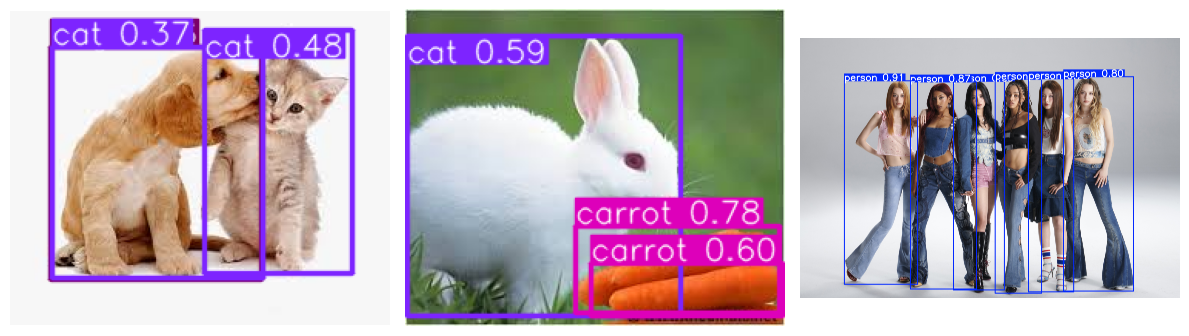

In [27]:
import cv2
fig, axes = plt.subplots(1, len(image_path), figsize=(12, 8))
for ax, result in zip(axes, results):
    im_bgr = result.plot()
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
    ax.imshow(im_rgb)
    ax.axis('off')
plt.tight_layout()
plt.show()

In this tutorial, you learned how to use a pretrained YOLO detection model to perform object detection in Python, demonstrating its speed and efficiency for accurately locating and labeling objects. Some potential next steps include processing multiple images in a directory, running detection on video or webcam streams, saving annotated frames to disk, or fine‑tuning a model on a specific dataset.